# CONSIGNES

Salut!  
On t'a importé la partie la plus intéressante notre base de données de films, que tu trouveras dans la variable __sc_films__ sous la forme d'un DataFrame pandas. Les différentes colonnes sont :
 - id : id du film dans notre base
 - title : titre du film
 - date_release : date de sortie du film. Si le jour ou le mois est égal à 00, c'est qu'il est inconnu.
 - rating : moyenne SensCritique de l'oeuvre, basée sur les notes des utilisateurs et pondérée en fonction de la fiabilité de l'utilisateur. Elle est souvent différente de la moyenne "brute" arithmétique de l'ordre d'un ou deux dizièmes. Exception notable : lorsque beaucoup d'utilisateurs créent un compte uniquement pour booster un film, ils augmentent ainsi artificiellement sa moyenne arithmétique, mais la moyenne SensCritique reste assez basse.
 - wish_list_count : nombre d'utilisateurs qui ont mis ce produit en envie
 - review_count : nombre de critiques de ce film
 - list_count : nombre de listes contenant ce produit
 - n_i : nombre d'utilisateurs ayant atrribué la note i (par exemple, n_3 : nombre d'utilisateur qui ont attribué un 3) 

En parallèle, tu as aussi accès au top 100 des tops 10, dans la variable __top_100_films__. Ce top est basé sur les réponses des utilisateurs au sondage qui leur demande leur top 10 films. On attribue des points aux films du top 10 de l'utilisateur, avec une prime aux films les mieux classés. On additionne ensuite les points gagnés par les films dans les différents tops, puis on fait un classement général. Les différentes colonnes sont :
 - rank : place dans le top 100
 - id : id du film dans notre base
 - title : titre du film

# Importations

In [683]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [684]:
sc_films = pd.read_csv('sc_films.csv')
top_100_films = pd.read_csv('top_100_films.csv')

Ton objectif est d'utiliser les données de __sc_films__ pour créer ton propre classement qui sera le plus proche possible du top 100, et qui le prolongera pour créer un top 200. Tu peux utiliser les features de __sc_films__ comme tu préfères, et donner à la fin de ton code ton classement des __200__ meilleurs films du site, sous la même forme que __top_100_films__, avec 200 films au lieu de 100, stocker ton classement dans une variable __top_200_films__.  
Pendant ton développement, tu peux bien sûr évaluer la qualité de ton classement en le comparant au top 100 que nous t'avons donné. Cependant, pour éviter l'overfitting, on comparera le classement que tu nous donnes à la partie cachée du top 100, qui contient les films entre la 101e et la 200e place.  
Heuristiquement, ton top devra représenter les films à la fois les mieux notés et les plus regardés. Attention, beaucoup d'utilisateurs ayant établi leur top 10 avant 2015, les films sortis après cette date sont moins susceptibles d'être dans les top 10 des utilisateurs, et donc dans le top 100.

# MON CODE

# 1) Définition du processus
#### a) Définition des modalités de succès
Dans notre cas, notre modèle sera jugé bon s'il se rapproche le plus possible de la liste des 100 films contenue dans le dataframe top_100_films
#### b) Exploration des données
Cette étape me mettra de mieux comprendre mes données, de voir leurs valeurs, leurs types et leurs unités;
#### c) Reformatage des données au besoin
Une fois les données comprises, je procederai à leur reformatage si cela est nécéssaire
#### d) Analyse et choix des features
Comprendre le rôle et la pertinance de chaque feature est primordiale. Ainsi, cette étape sera faite de data visualisation afin de voir comment se comporte les variables individuellement et aussi les correlations afin de mieux choisir les les features qui permettront d'entraîner notre modèle.
#### d) Conception et évaluation des modèles
- Cette étape consistera à choisir des techniques d'apprentissage automatique, de créer et d'entraîner les modèles. 
- Après les avoir entrainés, je procéderai à leu évaluation en utilisant des métriques (MSE, score, accuracy ...)

## 1) Exploration des données

In [685]:
sc_films.describe()

,id,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
count,2.780000e+03,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000
mean,4.654777e+06,632.800719,3392.321583,175.481295,1709.951799,248.144964,352.967266,592.131295,1020.650000,1879.868705,3349.156835,4806.811871,3881.827698,1668.721942,744.724820
std,8.867486e+06,108.277138,2916.662673,155.208451,1334.087972,577.403660,579.678320,752.847112,1047.409227,1627.472638,2709.104902,4651.218449,5544.555887,3535.271354,2122.943731
min,3.609290e+05,169.000000,138.000000,3.000000,175.000000,2.000000,1.000000,2.000000,14.000000,63.000000,127.000000,67.000000,23.000000,5.000000,4.000000
25%,4.071580e+05,565.000000,1247.000000,78.000000,849.750000,38.000000,57.750000,130.000000,299.000000,757.000000,1463.000000,1841.750000,881.750000,207.000000,95.000000
50%,4.539155e+05,651.000000,2531.000000,131.000000,1270.500000,92.000000,150.000000,313.500000,688.000000,1400.500000,2436.000000,3107.500000,1982.000000,595.500000,223.000000
75%,1.301605e+06,713.000000,4567.500000,215.250000,2077.250000,233.000000,402.500000,758.250000,1356.500000,2495.750000,4471.750000,6160.250000,4375.000000,1529.500000,581.000000
max,4.381260e+07,869.000000,26339.000000,1452.000000,11750.000000,9822.000000,7938.000000,6952.000000,8983.000000,15129.000000,26218.000000,42525.000000,59159.000000,54274.000000,44368.000000


In [653]:
top_100_films.describe()

,rank,id,rating_count
count,100.000000,1.000000e+02,100.000000
mean,50.500000,7.988791e+05,70569.250000
std,29.011492,1.860968e+06,39416.279954
min,1.000000,3.631610e+05,10980.000000
25%,25.750000,3.921695e+05,49303.750000
50%,50.500000,4.426030e+05,61452.500000
75%,75.250000,4.814638e+05,77439.500000
max,100.000000,1.191357e+07,234656.000000


### Repérage des colonnes ayant des "NaN"

In [686]:
sc_films.isnull().any()

id                 False
title              False
date_release        True
rating             False
wish_list_count    False
review_count       False
list_count         False
n_1                False
n_2                False
n_3                False
n_4                False
n_5                False
n_6                False
n_7                False
n_8                False
n_9                False
n_10               False
dtype: bool

###  Affichage des lignes ayant des valeurs NaN

In [687]:
sc_films[sc_films.date_release.isnull()]

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
277,402248,L'Homme qui tua Don Quichotte,NaN,651,6721,121,1228,37,68,144,309,626,1189,1837,1201,293,101
351,467716,L'Île aux fleurs,NaN,801,1905,42,692,14,18,13,32,95,282,1167,2349,1471,624
442,380806,Astérix le Gaulois,NaN,621,364,39,542,27,40,123,344,1140,2256,1742,551,112,71
846,20242705,Ghostland,NaN,662,3808,188,1399,88,121,223,382,711,1553,2571,1866,608,215
1000,360952,Drôles d'oiseaux sur une ligne à haute tension,NaN,743,741,29,920,21,18,40,111,365,1207,3218,2825,1037,440
1320,458137,Nuit et Brouillard,NaN,800,5303,69,1485,91,38,52,85,297,601,2338,4634,2437,1232


## 2) REFORMATAGE DES DONNEES

### Reconstituion de l'ensemble d'entraînement

In [656]:
df = pd.merge(top_100_films.copy().drop("id", axis=1), sc_films, on="title")
df

,rank,title,rating_count,id,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
0,1,Fight Club,234656,363185,1999-09-10,814,22970,829,11235,9606,4218,4844,5780,8801,13609,30142,59159,54129,44368
1,2,Pulp Fiction,218107,445539,1994-09-10,830,26339,626,11750,7121,3176,3602,4309,7223,11914,27892,55497,54274,43099
2,3,Interstellar,112192,388583,2014-11-05,785,11344,1452,9495,479,483,980,1920,3865,8734,19733,30315,27470,18213
3,4,2001 : L'Odyssée de l'espace,54554,475251,1968-04-03,796,17261,607,7343,345,427,715,1240,2514,4402,8633,13507,12004,10767
4,5,Blade Runner,61393,494050,1982-06-25,788,11684,598,7208,110,231,457,1113,2437,5670,12018,17509,13366,8482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,96,Cloud Atlas,38620,421236,2012-10-26,696,10253,730,4231,308,463,843,1690,3187,5938,9777,9320,4871,2223
99,97,Black Swan,75412,435721,2010-12-17,717,8988,974,5001,398,564,1091,2226,4540,10596,21602,21771,9462,3162
100,98,The Tree of Life,27272,381184,2011-05-17,633,14299,694,3381,833,1171,1627,2279,3350,4306,4987,4340,2693,1686
101,99,L'Armée des 12 singes,47438,391814,1995-12-08,775,9080,223,4707,82,117,243,492,1247,3919,11900,18147,8664,2627


### Vérifions si des films avec des dates de sorties inconnues font parties du top 100

In [657]:
df[df["date_release"].isnull()]

,rank,title,rating_count,id,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10


### Suppression des lignes n'ayant pas de ```date_release``` 
- ils ne font pas partie du top 100 utilisateurs;
- ils n'ont pas de date, une feature très importante;
- ils constituent une partie très minime du dataset

In [688]:
sc_films.dropna(inplace=True)
sc_films[sc_films["date_release"].isnull()]

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10


### Convertion des date de "str" à "datetime"

In [689]:
sc_films["date"] = pd.to_datetime(sc_films["date_release"])
sc_films["year"] = sc_films["date"].dt.year
sc_films[["date", "year"]]

,date,year
0,2020-08-26,2020
1,1965-03-10,1965
2,2017-02-08,2017
3,2017-11-17,2017
4,2021-03-31,2021
...,...,...
2775,2009-12-16,2009
2776,2009-08-20,2009
2777,2010-07-14,2010
2778,1994-09-10,1994


### Création d'une colonne binaire considérant si l'année de sortie est inférieure ou égale à 2015 

In [660]:
sc_films["rate_year"] = sc_films["date"].apply(lambda x : 1 if x.year <= 2015 else 0)
sc_films[["date","rate_year"]]

,date,rate_year
0,2020-08-26,0
1,1965-03-10,1
2,2017-02-08,0
3,2017-11-17,0
4,2021-03-31,0
...,...,...
2775,2009-12-16,1
2776,2009-08-20,1
2777,2010-07-14,1
2778,1994-09-10,1


## 3) VISALISATION DES DONNEES

### Création d'une colonne binaire considérant si l'année de sortie est inférieure ou égale à 2015 

In [690]:
sc_films["rate_year"] = sc_films["date"].apply(lambda x : 1 if x.year <= 2015 else 0)
sc_films[["date","rate_year"]]

,date,rate_year
0,2020-08-26,0
1,1965-03-10,1
2,2017-02-08,0
3,2017-11-17,0
4,2021-03-31,0
...,...,...
2775,2009-12-16,1
2776,2009-08-20,1
2777,2010-07-14,1
2778,1994-09-10,1


### Reconstituion de l'ensemble d'entraînement

In [691]:
df = pd.merge(top_100_films.copy().drop("id", axis=1), sc_films, on="title")
df

,rank,title,rating_count,id,date_release,rating,wish_list_count,review_count,list_count,n_1,...,n_4,n_5,n_6,n_7,n_8,n_9,n_10,date,year,rate_year
0,1,Fight Club,234656,363185,1999-09-10,814,22970,829,11235,9606,...,5780,8801,13609,30142,59159,54129,44368,1999-09-10,1999,1
1,2,Pulp Fiction,218107,445539,1994-09-10,830,26339,626,11750,7121,...,4309,7223,11914,27892,55497,54274,43099,1994-09-10,1994,1
2,3,Interstellar,112192,388583,2014-11-05,785,11344,1452,9495,479,...,1920,3865,8734,19733,30315,27470,18213,2014-11-05,2014,1
3,4,2001 : L'Odyssée de l'espace,54554,475251,1968-04-03,796,17261,607,7343,345,...,1240,2514,4402,8633,13507,12004,10767,1968-04-03,1968,1
4,5,Blade Runner,61393,494050,1982-06-25,788,11684,598,7208,110,...,1113,2437,5670,12018,17509,13366,8482,1982-06-25,1982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,96,Cloud Atlas,38620,421236,2012-10-26,696,10253,730,4231,308,...,1690,3187,5938,9777,9320,4871,2223,2012-10-26,2012,1
99,97,Black Swan,75412,435721,2010-12-17,717,8988,974,5001,398,...,2226,4540,10596,21602,21771,9462,3162,2010-12-17,2010,1
100,98,The Tree of Life,27272,381184,2011-05-17,633,14299,694,3381,833,...,2279,3350,4306,4987,4340,2693,1686,2011-05-17,2011,1
101,99,L'Armée des 12 singes,47438,391814,1995-12-08,775,9080,223,4707,82,...,492,1247,3919,11900,18147,8664,2627,1995-12-08,1995,1


### Vérifions si des films avec des dates de sorties inconnues font parties du top 100

In [692]:
df[df["date_release"].isnull()]

,rank,title,rating_count,id,date_release,rating,wish_list_count,review_count,list_count,n_1,...,n_4,n_5,n_6,n_7,n_8,n_9,n_10,date,year,rate_year


In [693]:
sc_films.sort_values(by="rating", ascending=False).head(5)

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,date,year,rate_year
2599,370894,Douze Hommes en colère,1957-04-10,869,15013,547,5449,74,28,57,121,301,993,4322,13636,18396,9616,1957-04-10,1957,1
615,402373,Harakiri,1962-09-16,860,11453,95,1844,27,6,19,26,68,216,771,2054,2488,1412,1962-09-16,1962,1
2629,368376,"Le Bon, la Brute et le Truand",1966-12-23,852,12259,330,5828,65,38,85,179,609,1777,6916,15603,15858,9822,1966-12-23,1966,1
1813,451324,Les Sept Samouraïs,1954-04-26,849,13065,188,3097,47,21,53,93,273,725,2375,5182,5340,3529,1954-04-26,1954,1
2493,440893,Il était une fois dans l'Ouest,1968-12-21,846,11545,321,4602,55,31,96,156,497,1529,5643,12001,11264,7099,1968-12-21,1968,1


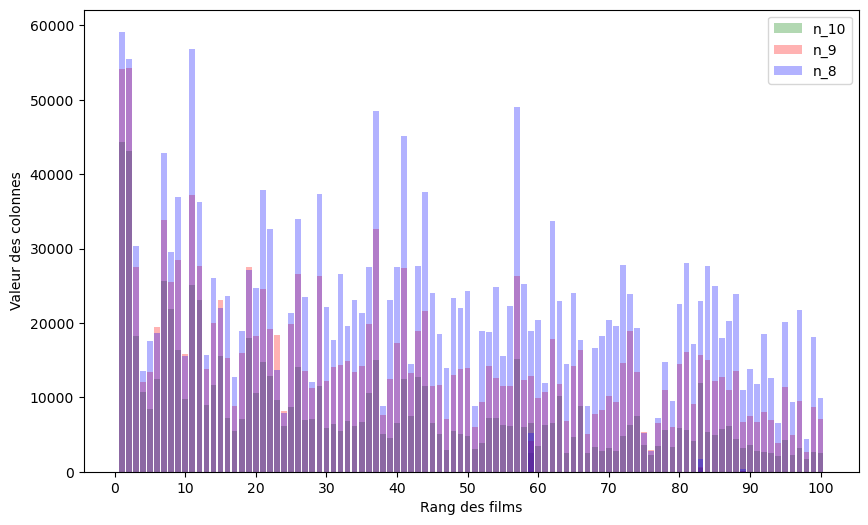

In [694]:
df[["rank", "n_7", "n_8", "n_9", "n_10", "list_count", "wish_list_count"]]
fig = plt.figure(figsize=(10, 6))
plt.bar(df["rank"], df["n_10"], color="g", alpha=0.3, label="n_10")
plt.bar(df["rank"], df["n_9"], color="r", alpha=0.3, label="n_9")
plt.bar(df["rank"], df["n_8"], color="b", alpha=0.3, label="n_8")

plt.xlabel('Rang des films')
plt.ylabel('Valeur des colonnes')
plt.xticks(range(0, 101, 10)) 
plt.legend()

### les n_i ne sont donc pas des critères qui permettent de passer 1er ou 10eme

### Répartition des dates 

(array([ 1.,  4.,  1.,  8., 10.,  6., 23., 26., 14., 10.]),
 array([1946. , 1953.3, 1960.6, 1967.9, 1975.2, 1982.5, 1989.8, 1997.1,
        2004.4, 2011.7, 2019. ]),
 <BarContainer object of 10 artists>)

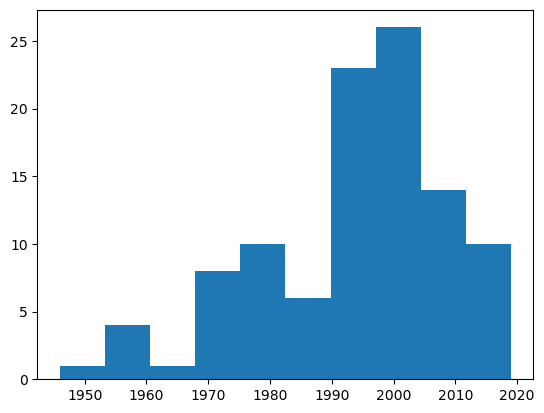

In [695]:
plt.hist(df["date"].dt.year.astype("int"))

### Répartition des rating_count 

(array([12., 28., 35.,  9.,  9.,  3.,  0.,  1.,  1.,  2.]),
 array([ 10980. ,  33347.6,  55715.2,  78082.8, 100450.4, 122818. ,
        145185.6, 167553.2, 189920.8, 212288.4, 234656. ]),
 <BarContainer object of 10 artists>)

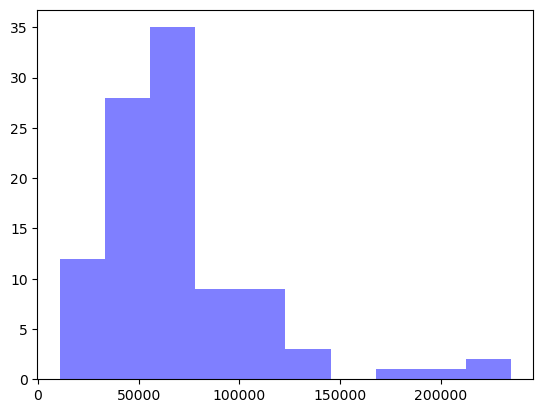

In [696]:
plt.hist(top_100_films["rating_count"], color="b", alpha=0.5)

### Relation entre rang et rating_count

<BarContainer object of 100 artists>

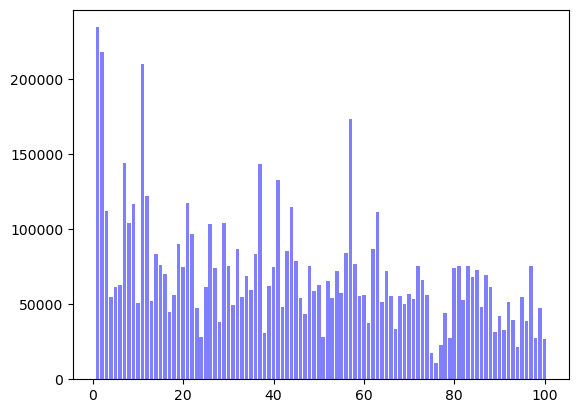

In [697]:
plt.bar(top_100_films["rank"], top_100_films["rating_count"], color="b", alpha=0.5)

### Tableau des correlations

KeyError: 'date'

C:\Users\kouam\AppData\Local\Temp\ipykernel_5212\2170890662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


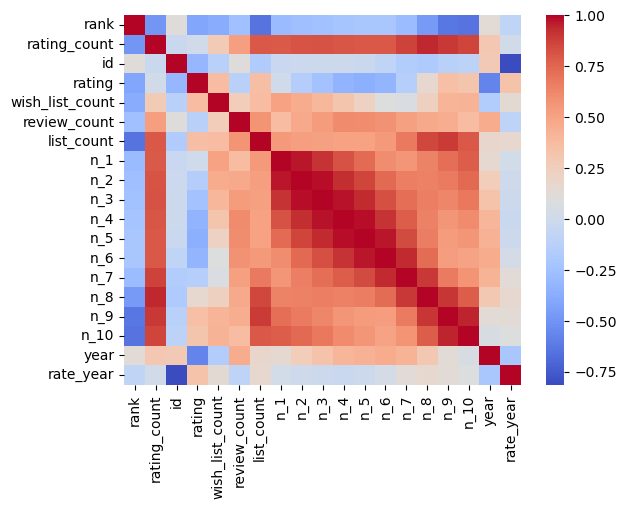

rank               1.000000
year               0.129431
id                 0.108906
rate_year         -0.086398
n_6               -0.206822
n_5               -0.216997
n_4               -0.227993
n_3               -0.248082
review_count      -0.261394
n_2               -0.265351
n_7               -0.286218
n_1               -0.291786
wish_list_count   -0.381309
rating            -0.411831
n_8               -0.468429
rating_count      -0.489459
n_9               -0.634972
list_count        -0.646578
n_10              -0.647311
Name: rank, dtype: float64


In [698]:
cor = df.corr()
sns.heatmap(cor, cmap='coolwarm', fmt=".2f")

plt.show()
print(cor['rank'].sort_values(ascending=False))

### On retire ```list_count``` car très fortement décorrelé avec la variable cible "rank" 

In [699]:
df.drop("list_count", axis=1)

,rank,title,rating_count,id,date_release,rating,wish_list_count,review_count,n_1,n_2,...,n_4,n_5,n_6,n_7,n_8,n_9,n_10,date,year,rate_year
0,1,Fight Club,234656,363185,1999-09-10,814,22970,829,9606,4218,...,5780,8801,13609,30142,59159,54129,44368,1999-09-10,1999,1
1,2,Pulp Fiction,218107,445539,1994-09-10,830,26339,626,7121,3176,...,4309,7223,11914,27892,55497,54274,43099,1994-09-10,1994,1
2,3,Interstellar,112192,388583,2014-11-05,785,11344,1452,479,483,...,1920,3865,8734,19733,30315,27470,18213,2014-11-05,2014,1
3,4,2001 : L'Odyssée de l'espace,54554,475251,1968-04-03,796,17261,607,345,427,...,1240,2514,4402,8633,13507,12004,10767,1968-04-03,1968,1
4,5,Blade Runner,61393,494050,1982-06-25,788,11684,598,110,231,...,1113,2437,5670,12018,17509,13366,8482,1982-06-25,1982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,96,Cloud Atlas,38620,421236,2012-10-26,696,10253,730,308,463,...,1690,3187,5938,9777,9320,4871,2223,2012-10-26,2012,1
99,97,Black Swan,75412,435721,2010-12-17,717,8988,974,398,564,...,2226,4540,10596,21602,21771,9462,3162,2010-12-17,2010,1
100,98,The Tree of Life,27272,381184,2011-05-17,633,14299,694,833,1171,...,2279,3350,4306,4987,4340,2693,1686,2011-05-17,2011,1
101,99,L'Armée des 12 singes,47438,391814,1995-12-08,775,9080,223,82,117,...,492,1247,3919,11900,18147,8664,2627,1995-12-08,1995,1


# 4) Constitution du top 100 

## CREATION D'UNE METRIQUE du type ```aX+bY+cZ``` avec :
- X : rate_year
- Y : review_count
- Z : rating
> avec a, b et c des entiers dans [1;4]

In [700]:
for a in range(1,4):
    for b in range(1,4):
        for c in range(1,4):
            column_name = f'{a}X + {b}Y + {c}Z'
            sc_films[column_name] = sc_films["rate_year"]*a + sc_films["rating"]*b + sc_films["review_count"]*c
            df[column_name] = df["rate_year"]*a + df["rating"]*b + df["review_count"]*c   
df.columns

Index(['rank', 'title', 'rating_count', 'id', 'date_release', 'rating',
       'wish_list_count', 'review_count', 'list_count', 'n_1', 'n_2', 'n_3',
       'n_4', 'n_5', 'n_6', 'n_7', 'n_8', 'n_9', 'n_10', 'date', 'year',
       'rate_year', '1X + 1Y + 1Z', '1X + 1Y + 2Z', '1X + 1Y + 3Z',
       '1X + 2Y + 1Z', '1X + 2Y + 2Z', '1X + 2Y + 3Z', '1X + 3Y + 1Z',
       '1X + 3Y + 2Z', '1X + 3Y + 3Z', '2X + 1Y + 1Z', '2X + 1Y + 2Z',
       '2X + 1Y + 3Z', '2X + 2Y + 1Z', '2X + 2Y + 2Z', '2X + 2Y + 3Z',
       '2X + 3Y + 1Z', '2X + 3Y + 2Z', '2X + 3Y + 3Z', '3X + 1Y + 1Z',
       '3X + 1Y + 2Z', '3X + 1Y + 3Z', '3X + 2Y + 1Z', '3X + 2Y + 2Z',
       '3X + 2Y + 3Z', '3X + 3Y + 1Z', '3X + 3Y + 2Z', '3X + 3Y + 3Z'],
      dtype='object')

### Nouveau tableau des correlations

C:\Users\kouam\AppData\Local\Temp\ipykernel_5212\915019597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


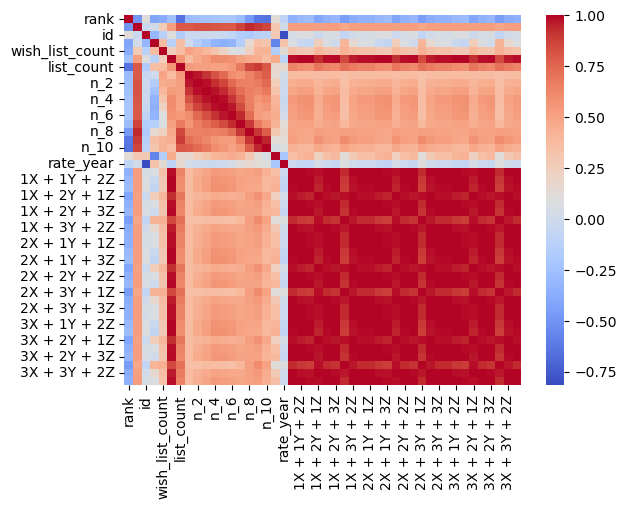

rank               1.000000
year               0.129431
id                 0.108906
rate_year         -0.086398
n_6               -0.206822
n_5               -0.216997
n_4               -0.227993
n_3               -0.248082
review_count      -0.261394
n_2               -0.265351
n_7               -0.286218
1X + 1Y + 3Z      -0.289842
2X + 1Y + 3Z      -0.289861
3X + 1Y + 3Z      -0.289881
n_1               -0.291786
1X + 1Y + 2Z      -0.303720
2X + 1Y + 2Z      -0.303749
3X + 1Y + 2Z      -0.303777
1X + 2Y + 3Z      -0.317286
2X + 2Y + 3Z      -0.317305
3X + 2Y + 3Z      -0.317324
1X + 3Y + 3Z      -0.343386
1X + 2Y + 2Z      -0.343394
2X + 3Y + 3Z      -0.343403
1X + 1Y + 1Z      -0.343421
2X + 2Y + 2Z      -0.343421
3X + 3Y + 3Z      -0.343421
3X + 2Y + 2Z      -0.343447
2X + 1Y + 1Z      -0.343473
3X + 1Y + 1Z      -0.343525
1X + 3Y + 2Z      -0.379359
2X + 3Y + 2Z      -0.379382
3X + 3Y + 2Z      -0.379405
wish_list_count   -0.381309
1X + 2Y + 1Z      -0.410885
2X + 2Y + 1Z      -0

In [701]:
cor = df.corr()
sns.heatmap(cor, cmap='coolwarm', fmt=".2f")
plt.show()
cor["rank"].sort_values(ascending=False)

In [702]:
df = df.sort_values(by="rank")

In [703]:
y_pred1 = sc_films.sort_values(by="3X + 3Y + 1Z", ascending=False)[["3X + 3Y + 1Z", "title", "id"]].head(100).reset_index()
y_pred1["rank"] = y_pred1.index + 1
merged_df1 = pd.merge(y_pred1[["rank", "title"]], df[["rank", "title"]], on='title', suffixes=('_df1', '_df2'))
score1 = (merged_df1["rank_df1"] - merged_df1["rank_df2"].sort_values()).abs()
len(score2[score2 < 10]) 

10

In [704]:
y_pred2 = sc_films.sort_values(by="3X + 3Y + 1Z", ascending=False)[["3X + 3Y + 1Z", "title", "id"]].head(100).reset_index()
y_pred2["rank"] = y_pred1.index + 1
merged_df2 = pd.merge(y_pred2[["rank", "title"]], df[["rank", "title"]], on='title', suffixes=('_df1', '_df2'))
score2 = (merged_df2["rank_df1"] - merged_df2["rank_df2"].sort_values()).abs()
len(score2[score2 < 10])

10

In [705]:
y_pred3 = sc_films.sort_values(by="3X + 3Y + 1Z", ascending=False)[["3X + 3Y + 1Z", "title", "id"]].head(100).reset_index()
y_pred3["rank"] = y_pred1.index + 1
merged_df3 = pd.merge(y_pred3[["rank", "title"]], df[["rank", "title"]], on='title', suffixes=('_df1', '_df2'))
score3 = (merged_df3["rank_df1"] - merged_df3["rank_df2"].sort_values()).abs()
len(score3[score3 < 10]) 

10

In [706]:
y_pred3 = y_pred3.rename(columns={"3X + 3Y + 1Z": "rating_count"})
mon_top_100 = y_pred3
mon_top_100 = y_pred3.reindex(columns=["rank", "id", "title", "rating_count"])
mon_top_100.index = mon_top_100.index + 101
mon_top_100

,rank,id,title,rating_count
101,1,388583,Interstellar,3810
102,2,471143,Inception,3524
103,3,432630,Django Unchained,3512
104,4,390938,Drive,3484
105,5,480435,Mad Max - Fury Road,3461
...,...,...,...,...
196,96,497324,Barry Lyndon,2705
197,97,362143,Deadpool,2704
198,98,402567,Prometheus,2703
199,99,453901,Memories of Murder,2698


# 5) Exportation du fichier csv 

In [708]:
top_200_films = pd.concat([top_100_films, mon_top_100], axis=0).reset_index()
top_200_films = top_200_films.drop(columns="index")
top_200_films.to_csv('top_200_films.csv', index=False)